In [1]:
import pandas as pd 
data = pd.read_csv('강원도 춘천시_관광지 및 상권 정밀 위치기반 이용자 실태 현황_20211221.csv', encoding='cp949')

In [11]:
pd.set_option('display.max_columns', 8)

In [12]:
data

,상호명,날짜,업종,위도,...,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,...,1.36,4.14,91.06,2021-12-21
1,여의도순복음춘천교회,2021-07-19,종교시설,37.849759,...,25.55,21.69,20.70,2021-12-21
2,디자인카페티이오,2021-07-19,카페,37.884288,...,21.89,21.74,21.95,2021-12-21
3,브이스페이스(VSpace),2021-07-19,카페,37.815480,...,20.02,22.26,26.60,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,...,19.13,22.74,21.77,2021-12-21
...,...,...,...,...,...,...,...,...,...
984657,블랙박스,2021-11-17,의류판매,37.879256,...,17.61,15.24,21.87,2021-12-21
984658,뉴욕바닷가재,2021-11-17,음식점,37.841142,...,22.37,21.64,22.35,2021-12-21
984659,봄시내재가노인복지센터,2021-11-17,기타시설,37.881195,...,22.66,25.20,20.02,2021-12-21
984660,춘천2번지닭갈비,2021-11-17,음식점,37.852734,...,18.51,25.04,21.23,2021-12-21


In [2]:
df = data[data['읍면동'].isin(['동면 만천리'])] 

In [3]:
df 

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
11,경복궁개성손만두요리전문점,2021-07-19,음식점,37.879449,127.768234,강원,춘천시,동면 만천리,394,42.65,57.35,15.93,14.73,21.92,28.14,19.28,2021-12-21
47,춘천문고,2021-07-19,기타시설,37.881456,127.759941,강원,춘천시,동면 만천리,236,54.87,45.13,16.13,14.93,22.12,27.34,19.48,2021-12-21
50,최문규건축사사무소,2021-07-19,기타시설,37.881239,127.767217,강원,춘천시,동면 만천리,81,53.87,46.13,16.87,15.58,23.30,24.06,20.19,2021-12-21
86,온빛독서실,2021-07-19,기타시설,37.885420,127.761827,강원,춘천시,동면 만천리,79,53.90,46.10,16.74,15.55,22.73,24.89,20.09,2021-12-21
107,정가네식품,2021-07-19,기타시설,37.885757,127.757198,강원,춘천시,동면 만천리,74,52.58,47.42,17.31,15.99,23.47,22.61,20.62,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984604,구름다리주유소,2021-11-17,기타시설,37.878132,127.759583,강원,춘천시,동면 만천리,84,46.19,53.81,16.41,15.17,22.45,26.21,19.76,2021-12-21
984615,나의욕실,2021-11-17,기타시설,37.885848,127.757428,강원,춘천시,동면 만천리,83,47.42,52.58,16.98,15.75,22.94,24.01,20.32,2021-12-21
984616,스마일당구장,2021-11-17,실내집단운동시설,37.880374,127.763796,강원,춘천시,동면 만천리,316,30.60,69.40,15.64,14.52,21.61,29.18,19.05,2021-12-21
984645,대경종합주방,2021-11-17,기타시설,37.885092,127.763258,강원,춘천시,동면 만천리,118,48.22,51.78,16.39,15.15,22.40,26.32,19.74,2021-12-21


In [4]:
# 상호명별 이용자수 합계 구하기
usage_sum = df.groupby('상호명')['이용자수'].sum()

# 상호명별 등장 횟수 구하기
count_by_name = df['상호명'].value_counts()

# 이용자수 합계를 등장 횟수로 나누어 평균 구하기
average_usage = usage_sum / count_by_name

# 평균 이용자수를 데이터프레임에 추가
df['평균이용자수'] = df['상호명'].map(average_usage)

# 중복된 상호명 제거
df.drop_duplicates(subset='상호명', inplace=True)

print(df)

                상호명          날짜    업종         위도          경도  시도  시군구     읍면동  \
11    경복궁개성손만두요리전문점  2021-07-19   음식점  37.879449  127.768234  강원  춘천시  동면 만천리   
47             춘천문고  2021-07-19  기타시설  37.881456  127.759941  강원  춘천시  동면 만천리   
50        최문규건축사사무소  2021-07-19  기타시설  37.881239  127.767217  강원  춘천시  동면 만천리   
86            온빛독서실  2021-07-19  기타시설  37.885420  127.761827  강원  춘천시  동면 만천리   
107           정가네식품  2021-07-19  기타시설  37.885757  127.757198  강원  춘천시  동면 만천리   
...             ...         ...   ...        ...         ...  ..  ...     ...   
7960           한국유리  2021-07-19  기타시설  37.881959  127.761227  강원  춘천시  동면 만천리   
7966    강원자동차정비사업조합  2021-07-19  기타시설  37.878690  127.766987  강원  춘천시  동면 만천리   
7982    현대자동차 호반대리점  2021-07-19  기타시설  37.873185  127.765312  강원  춘천시  동면 만천리   
8029             태극  2021-07-19  기타시설  37.876154  127.767211  강원  춘천시  동면 만천리   
8055           거성교회  2021-07-19  종교시설  37.881652  127.758662  강원  춘천시  동면 만천리   

      이용자수   남성비율   여성비율  1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8524\2401372191.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['평균이용자수'] = df['상호명'].map(average_usage)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8524\2401372191.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='상호명', inplace=True)


In [5]:
df

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일,평균이용자수
11,경복궁개성손만두요리전문점,2021-07-19,음식점,37.879449,127.768234,강원,춘천시,동면 만천리,394,42.65,57.35,15.93,14.73,21.92,28.14,19.28,2021-12-21,182.877049
47,춘천문고,2021-07-19,기타시설,37.881456,127.759941,강원,춘천시,동면 만천리,236,54.87,45.13,16.13,14.93,22.12,27.34,19.48,2021-12-21,251.500000
50,최문규건축사사무소,2021-07-19,기타시설,37.881239,127.767217,강원,춘천시,동면 만천리,81,53.87,46.13,16.87,15.58,23.30,24.06,20.19,2021-12-21,84.590164
86,온빛독서실,2021-07-19,기타시설,37.885420,127.761827,강원,춘천시,동면 만천리,79,53.90,46.10,16.74,15.55,22.73,24.89,20.09,2021-12-21,143.967213
107,정가네식품,2021-07-19,기타시설,37.885757,127.757198,강원,춘천시,동면 만천리,74,52.58,47.42,17.31,15.99,23.47,22.61,20.62,2021-12-21,73.581967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7960,한국유리,2021-07-19,기타시설,37.881959,127.761227,강원,춘천시,동면 만천리,114,53.82,46.18,16.48,15.23,22.61,25.87,19.81,2021-12-21,115.967213
7966,강원자동차정비사업조합,2021-07-19,기타시설,37.878690,127.766987,강원,춘천시,동면 만천리,315,53.42,46.58,16.55,15.36,22.54,25.65,19.90,2021-12-21,120.745902
7982,현대자동차 호반대리점,2021-07-19,기타시설,37.873185,127.765312,강원,춘천시,동면 만천리,79,29.90,70.10,17.50,16.18,23.56,21.95,20.81,2021-12-21,100.426230
8029,태극,2021-07-19,기타시설,37.876154,127.767211,강원,춘천시,동면 만천리,72,54.53,45.47,17.09,15.87,23.15,23.44,20.45,2021-12-21,73.836066


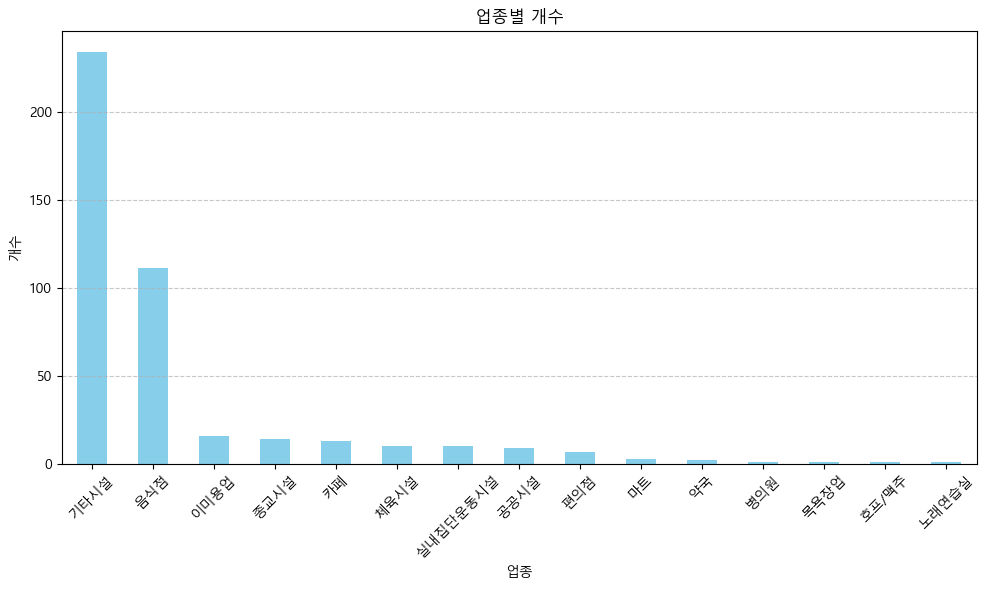

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import matplotlib.pyplot as plt
# 업종별 개수 집계
업종별_개수 = df['업종'].value_counts()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
업종별_개수.plot(kind='bar', color='skyblue')
plt.title('업종별 개수')
plt.xlabel('업종')
plt.ylabel('개수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

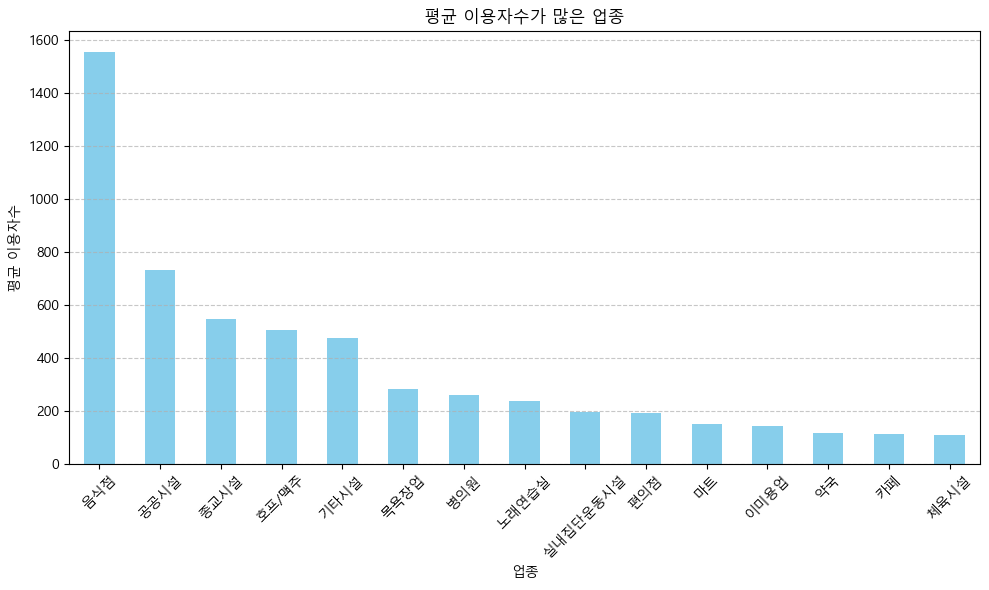

In [7]:
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별.plot(kind='bar', color='skyblue')
plt.title('평균 이용자수가 많은 업종')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

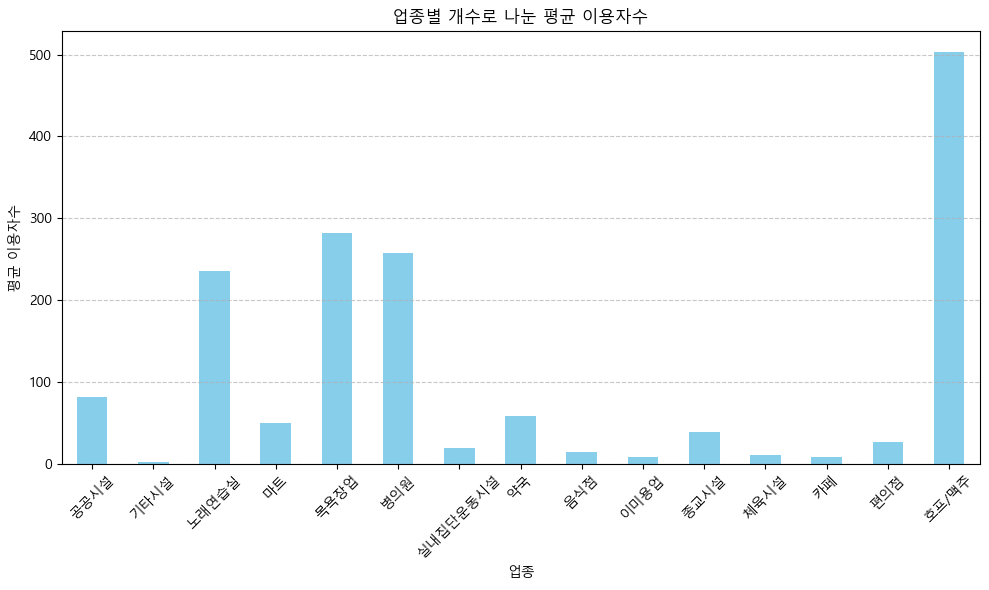

In [8]:
업종별_개수 = df['업종'].value_counts()

# 업종별 평균 이용자수 계산
평균이용자수_업종별 = df.groupby('업종')['평균이용자수'].mean()

# 업종별 개수로 이용자수를 나누기
평균이용자수_업종별_정규화 = 평균이용자수_업종별 / 업종별_개수

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
평균이용자수_업종별_정규화.plot(kind='bar', color='skyblue')
plt.title('업종별 개수로 나눈 평균 이용자수')
plt.xlabel('업종')
plt.ylabel('평균 이용자수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
df_combined = df

In [10]:
import folium
from folium.plugins import MarkerCluster

# 첫 번째 데이터셋
map_center = [df['위도'].mean(), df['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 첫 번째 데이터셋의 마커 (기본 색상)
for index, row in df.iterrows():
    popup = folium.Popup(row['상호명'], parse_html=True)
    folium.Marker([row['위도'], row['경도']], popup=popup).add_to(marker_cluster)

# 지도를 표시
mymap

In [11]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
# K-means 클러스터링 수행 (가중치 적용)
k = 3  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_
# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color='blue' if row['클러스터'] == 0 else 'green' if row['클러스터'] == 1 else 'red')
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8524\3709170538.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


In [12]:
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# K-means 클러스터링 수행 (가중치 적용)
k = 4  # 클러스터의 수
coordinates = df_combined[['위도', '경도']]
weights = df_combined['평균이용자수']

kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates, sample_weight=weights)
df_combined['클러스터'] = kmeans.labels_

# 가중치 적용된 클러스터 중심 좌표
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 마커 클러스터링 추가
marker_cluster = MarkerCluster().add_to(mymap)

# 색상을 클러스터별로 지정
cluster_colors = {1: 'green', 2: 'red', 3: 'purple'}

# 정류장 위치 표시 및 클러스터링
for idx, row in df_combined.iterrows():
    if row['클러스터'] == 0:
        continue  # 클러스터 0에 속하는 데이터 포인트를 제외
    popup = folium.Popup(f"{row['상호명']} (합계: {row['평균이용자수']})", parse_html=True)
    color = cluster_colors.get(row['클러스터'], 'gray')  # 클러스터 색상 지정
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup,
        tooltip=row['상호명'],
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="가중치 적용된 클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# Jupyter Notebook 환경에서 지도 출력
mymap


C:\Users\Administrator\AppData\Local\Temp\ipykernel_8524\1776994287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['클러스터'] = kmeans.labels_


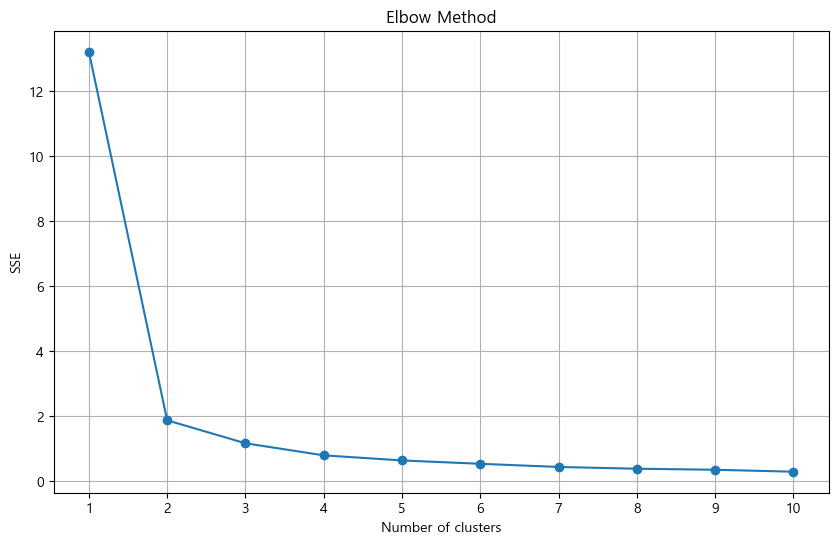

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터 개수 후보
max_k = 10
sse = []

# K-means 클러스터링 수행 및 SSE 계산
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(coordinates, sample_weight=weights)
    sse.append(kmeans.inertia_)

# SSE 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.show()


In [14]:
centers_man = centers 

In [15]:
#버스 

In [16]:
import pandas as pd
df = pd.read_csv('chuncheon_villages.csv',encoding='cp949')

In [17]:
result = df[df['노선번호'].isin(['100', '100-1','101','200','200-1','300','400','1', '2','3','4','6','7','7-1','7-2','7-3','8','8-1','9','10','10-1','11','12','13','13-1','14','15','16','16-1',
                            '17','18'])]

In [18]:
df = result

In [19]:
stops_to_keep = [
    '만천로143번', '길구름다리주유소', '동신장로교회', '만천초교', '동면만천농협',
    '만천2리마을회관', '만천주공A', '춘천여고앞', '동광주유소', '강동농협장학지점'
]

# 해당 정류장만 필터링
filtered_df = df[df['정류장명'].isin(stops_to_keep)]

In [20]:
filtered_df

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
91,2,250000200,3,250001754,강동농협장학지점,127.75321,37.89175,2024-01-02,"동면농협장학지점, 춘천로, 만천리, 춘천시, 강원특별자치도, 24296, 대한민국"
172,2,250000200,84,250001753,강동농협장학지점,127.75348,37.89169,2024-01-02,"동면농협장학지점, 춘천로, 만천리, 춘천시, 강원특별자치도, 24296, 대한민국"
411,4,250000400,6,250001512,만천초교,127.75812,37.88265,2024-01-02,"만천초교, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
412,4,250000400,7,250001508,동면만천농협,127.76097,37.88164,2024-01-02,"동면만천농협, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
414,4,250000400,9,250026533,동신장로교회,127.75980,37.87816,2024-01-02,"후만로, 후평주공7단지아파트, 만천리, 춘천시, 강원특별자치도, 24312, 대한민국"
501,4,250000400,96,250001509,동면만천농협,127.76087,37.88187,2024-01-02,"만천로, 만천리, 춘천시, 강원특별자치도, 24215, 대한민국"
502,4,250000400,97,250001515,만천초교,127.75847,37.88275,2024-01-02,"만천로, 만천리, 춘천시, 강원특별자치도, 24215, 대한민국"
616,6,250000600,6,250001512,만천초교,127.75812,37.88265,2024-01-02,"만천초교, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
617,6,250000600,7,250001508,동면만천농협,127.76097,37.88164,2024-01-02,"동면만천농협, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
619,6,250000600,9,250026533,동신장로교회,127.75980,37.87816,2024-01-02,"후만로, 후평주공7단지아파트, 만천리, 춘천시, 강원특별자치도, 24312, 대한민국"


In [21]:
df_combined = filtered_df

In [22]:
df_combined = df_combined.drop_duplicates(subset=['정류장명'], keep='first')

In [23]:
df_combined

,노선번호,노선(ID),정류장순서,정류장(ID),정류장명,경도,위도,데이터기준일,주소
91,2,250000200,3,250001754,강동농협장학지점,127.75321,37.89175,2024-01-02,"동면농협장학지점, 춘천로, 만천리, 춘천시, 강원특별자치도, 24296, 대한민국"
411,4,250000400,6,250001512,만천초교,127.75812,37.88265,2024-01-02,"만천초교, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
412,4,250000400,7,250001508,동면만천농협,127.76097,37.88164,2024-01-02,"동면만천농협, 만천로, 만천리, 춘천시, 강원특별자치도, 24216, 대한민국"
414,4,250000400,9,250026533,동신장로교회,127.75980,37.87816,2024-01-02,"후만로, 후평주공7단지아파트, 만천리, 춘천시, 강원특별자치도, 24312, 대한민국"
1437,9,250000900,3,250001562,동광주유소,127.75181,37.88988,2024-01-02,"동광주유소, 춘천로407번길, 만천리, 춘천시, 강원특별자치도, 24233, 대한민국"
2892,17,250001700,4,250026921,춘천여고앞,127.76149,37.88594,2024-01-02,"춘천여고앞, 춘천순환로, 만천리, 춘천시, 강원특별자치도, 24214, 대한민국"
2893,17,250001700,5,250026691,만천주공A,127.75930,37.88438,2024-01-02,"만천주공A, 후석로326번길, 만천리, 춘천시, 강원특별자치도, 24215, 대한민국"
3377,400,250040000,12,250026922,만천2리마을회관,127.76693,37.88071,2024-01-02,"439, 춘천순환로, 만천리, 춘천시, 강원특별자치도, 24215, 대한민국"


In [24]:
import folium

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)
# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap

In [25]:
from sklearn.cluster import KMeans
import folium

# K-means 클러스터링 수행
k = 2  # 클러스터의 수 (임의로 지정)
coordinates = df_combined[['위도', '경도']]
kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
centers = kmeans.cluster_centers_

# Folium 지도 생성
map_center = [df_combined['위도'].mean(), df_combined['경도'].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심 위치 표시
for center in centers:
    folium.Marker(
        location=[center[0], center[1]],
        popup="클러스터 중심",
        icon=folium.Icon(color='black', icon='info-sign')
    ).add_to(mymap)

# 다른 위치 정보 추가
for index, row in df_combined.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['정류장명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mymap)

# 지도 출력
mymap


In [29]:
# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
map_center = [centers_man[:, 0].mean(), centers_man[:, 1].mean()]
mymap = folium.Map(location=map_center, zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.CircleMarker(
        location=center,
        radius=30,
        color='purple',
        fill=True,
        fill_color='purple',
        popup=f'클러스터 중심 {i+1}'
    ).add_to(mymap)

# 클러스터링된 지점들을 지도에 추가
colors = ['blue', 'green']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.CircleMarker(
        location=location,
        radius=5,
        color=colors[label],
        fill=True,
        fill_color=colors[label],
        popup=f'지점 {i+1}'
    ).add_to(mymap)

# 지도 출력 (주피터 노트북이나 IPython 환경에서)
mymap

In [27]:
centers

array([[ 37.890815  , 127.75251   ],
       [ 37.88224667, 127.76110167]])

In [28]:
# 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=0).fit(centers_man)
labels = kmeans.labels_

# Folium 지도 생성
m = folium.Map(location=[37.87, 127.74], zoom_start=14)

# 클러스터 중심을 지도에 추가
for i, center in enumerate(centers):
    folium.Marker(location=center, popup=f'Center {i+1}', icon=folium.Icon(color='red')).add_to(m)

# 클러스터링된 지점들을 지도에 추가
colors = ['blue', 'green']
for i, (location, label) in enumerate(zip(centers_man, labels)):
    folium.Marker(location=location, popup=f'Man {i+1}', icon=folium.Icon(color=colors[label])).add_to(m)

m

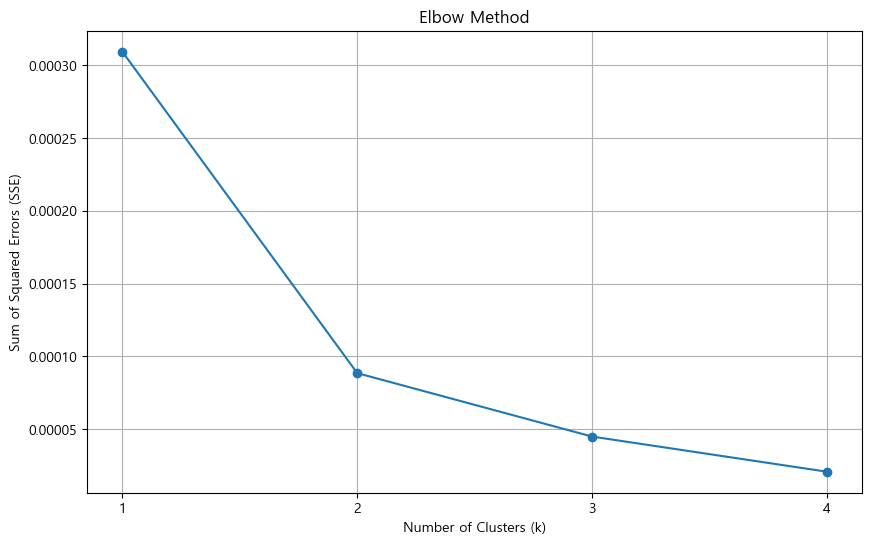

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE(Sum of Squared Errors)를 계산하는 함수
def calculate_sse(data, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        sse.append(kmeans.inertia_)
    return sse

# K의 범위 설정
k_range = range(1, 5)  # 1부터 4까지의 클러스터 개수를 시도
  # 1부터 10까지의 클러스터 개수를 시도

# SSE 계산
sse = calculate_sse(coordinates, k_range)

# Elbow Method 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()